In [61]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("231214_normalized_cytoplasm_all.csv")
experiments = df['experiment'].unique()
experiments_treatments_dict = {name: group["treatment"].unique().tolist() for name, group in df.groupby("experiment")}
experiments_cellline_dict = {name: group["cell_line"].unique().tolist() for name, group in df.groupby("experiment")}
measures = ["na1","na2","nt1","nt2","ntm","fa1","fa2","ft1","ft2","ftm","nint","fint","normrr"]

In [18]:
# Step 1 
def subsetDF(df, experiment, cell_line=None, treatment=None):

    if cell_line is not None:
        criteria = (df['experiment'] == experiment) & (df['cell_line'] == cell_line)
    elif treatment is not None: 
        criteria = (df['experiment'] == experiment) & (df['treatment'] == treatment)
    subset_df = df[criteria].reset_index(drop=True)
    return subset_df

sdf = subsetDF(df, 'glytcafao',treatment='etomoxir')[measures]

In [49]:
# step 1 standardize the features 
# before standardization 
sdf['na1'].mean() # not 0
sdf['na1'].var() # not 1
# standardization 
scaler = StandardScaler()
sd_df = scaler.fit_transform(sdf)
# the standardized 
sd_df[:, 0].mean()
sd_df[:, 0].var()

1.0

In [56]:
# step 2: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sd_df)
eigenvalues = pca.explained_variance_ratio_
eigenvalues

array([0.28721997, 0.21809418])

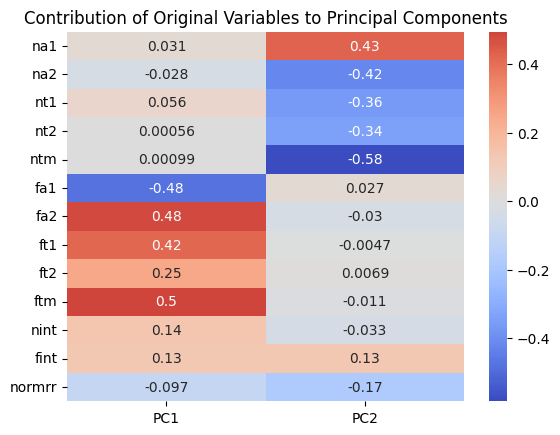

In [62]:
loadings = pca.components_.T  # Transposing so each column corresponds to a PC
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=measures)
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Contribution of Original Variables to Principal Components')
plt.show()